# Notebook description
This notebook presents the Preprocessing and Exploratory Data Analysis of the dataset used to build machine learning models capable of predicting different variables of interest concerning inkjet printing deposition parameters and the resulting films.

# Loading the libraries and Preprocessing
## Import libraries
Load the libraries necessary to do data preparation and for machine learning.


In [58]:
# EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from statistics import mean
import itertools
from statsmodels.graphics.mosaicplot import mosaic
import pandas_profiling

# The Patch library is imported to fix a legend issue, not allowing to show more than one variable
from matplotlib.patches import Patch

# Library to format the axes
import matplotlib.ticker as mtick

# Plots appear in the same notebook cell
%matplotlib inline

# Seaborn style
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("paper")

# Activate latex text rendering for figure labels
from matplotlib import rc
rc('text', usetex=False)

# Function to display dataframes side_by_side
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

## Load data
We will load the excel file. It is necessary to install the openpyxl library, because the "read_excel" function doesn't work for ".xlsx" files without this library.

In [59]:
# Load dataset
data = pd.read_excel("ExpCond_pyrolysis_230samples_article.xlsx", engine='openpyxl')
data.shape

(231, 16)

## Check the dataset
We will check the head and tail of the excel file with the data.

In [60]:
data.head()

,Nozzle 1,Nozzle 2,Nozzle 1 Voltage (V),Nozzle 2 Voltage (V),Average Voltage (V),Nozzle 1 Pulse Length (us),Nozzle 2 Pulse Length (us),Average Pulse Length (us),Drop Volume Nozzle 1 (pl),Drop Volume Nozzle 2 (pl),Average Drop Volume (pl),Drop Pitch (um),Line Pitch (um),nº of drops,Total Volume Deposited (ul),Amine (%)
0,132,0,135.0,NaN,135.0,26.0,NaN,26.0,NaN,NaN,185.0,175,75.0,1904.761905,0.352381,1.14
1,140,0,110.0,NaN,110.0,23.0,NaN,23.0,NaN,NaN,190.0,200,50.0,2500.000000,0.475000,1.14
2,132,0,135.0,NaN,135.0,26.0,NaN,26.0,NaN,NaN,190.0,175,50.0,2857.142857,0.542857,1.14
3,132,0,145.0,NaN,145.0,27.0,NaN,27.0,NaN,NaN,220.0,100,100.0,2500.000000,0.550000,1.14
4,140,140,140.0,120.0,130.0,26.0,26.0,26.0,210.0,228.0,219.0,95,95.0,2770.083102,0.606648,1.14


In [61]:
data.tail()

,Nozzle 1,Nozzle 2,Nozzle 1 Voltage (V),Nozzle 2 Voltage (V),Average Voltage (V),Nozzle 1 Pulse Length (us),Nozzle 2 Pulse Length (us),Average Pulse Length (us),Drop Volume Nozzle 1 (pl),Drop Volume Nozzle 2 (pl),Average Drop Volume (pl),Drop Pitch (um),Line Pitch (um),nº of drops,Total Volume Deposited (ul),Amine (%)
226,132,140,170.0,140.0,155.0,26.0,26.0,26.0,220.0,230.0,225.0,50,80.0,6250.0,1.40625,2.00
227,132,140,170.0,140.0,155.0,26.0,26.0,26.0,220.0,230.0,225.0,50,80.0,6250.0,1.40625,2.00
228,132,140,170.0,140.0,155.0,26.0,26.0,26.0,220.0,230.0,225.0,50,80.0,6250.0,1.40625,2.00
229,132,140,165.0,142.0,153.5,26.0,25.0,25.5,NaN,NaN,238.0,50,80.0,6250.0,1.48750,2.00
230,132,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,50,50.0,10000.0,1.80000,1.14


## Drop columns
We will drop the columns with redundant information.

In [62]:
# Drop columns
data_final = data.drop(labels=[
                                 'Nozzle 1', 'Nozzle 1 Voltage (V)', 'Nozzle 1 Pulse Length (us)', 
                                 'Drop Volume Nozzle 1 (pl)', 
                                 'Nozzle 2', 'Nozzle 2 Voltage (V)', 'Nozzle 2 Pulse Length (us)',
                                 'Drop Volume Nozzle 2 (pl)'
                                ], axis=1, inplace=False)

In [63]:
# Check the dataset again
data_final.head()

,Average Voltage (V),Average Pulse Length (us),Average Drop Volume (pl),Drop Pitch (um),Line Pitch (um),nº of drops,Total Volume Deposited (ul),Amine (%)
0,135.0,26.0,185.0,175,75.0,1904.761905,0.352381,1.14
1,110.0,23.0,190.0,200,50.0,2500.000000,0.475000,1.14
2,135.0,26.0,190.0,175,50.0,2857.142857,0.542857,1.14
3,145.0,27.0,220.0,100,100.0,2500.000000,0.550000,1.14
4,130.0,26.0,219.0,95,95.0,2770.083102,0.606648,1.14


## Statistics on the dataset
We will check different statistic parameters for the different variables of the dataset.

In [64]:
# Check the statistics of the dataset
data_final.describe()

,Average Voltage (V),Average Pulse Length (us),Average Drop Volume (pl),Drop Pitch (um),Line Pitch (um),nº of drops,Total Volume Deposited (ul),Amine (%)
count,213.000000,213.000000,231.000000,231.000000,231.00000,231.000000,231.000000,231.000000
mean,149.873239,25.507042,203.259740,101.818182,66.67316,4990.487637,0.999752,1.655584
std,22.927653,1.134243,19.419277,62.569487,26.21292,1220.740273,0.200036,0.412458
min,95.000000,20.000000,140.000000,45.000000,20.00000,1904.761905,0.352381,0.000000
25%,135.000000,25.000000,190.000000,50.000000,40.00000,3906.250000,0.839844,1.140000
50%,150.000000,25.500000,205.000000,80.000000,80.00000,5000.000000,1.000000,2.000000
75%,160.000000,26.000000,220.000000,160.000000,85.00000,5882.352941,1.164216,2.000000
max,234.000000,30.000000,240.000000,250.000000,110.00000,10000.000000,1.800000,2.300000


## Null values treatment
From the previous representation of the dataset, we can see that there are **null** values present. Therefore, it will be necessary to check which columns have null values and treat them accordingly.

In [65]:
# Check if there are null values and how many for each variable
data_final.isnull().sum()

Average Voltage (V)            18
Average Pulse Length (us)      18
Average Drop Volume (pl)        0
Drop Pitch (um)                 0
Line Pitch (um)                 0
nº of drops                     0
Total Volume Deposited (ul)     0
Amine (%)                       0
dtype: int64

Null values were found only in the columns **Average Voltage (V)** and **Average Pulse Length (us)**. We will fill them with the mean value of each column.

In [66]:
# Fill NA values column 'Average Voltage (V)'
data_final['Average Voltage (V)'].fillna((data_final['Average Voltage (V)'].mean()), inplace = True)

# Fill NA values column 'Average Pulse Length (us)'
data_final['Average Pulse Length (us)'].fillna((data_final['Average Pulse Length (us)'].mean()), 
                                               inplace = True)

We will check the null values again to see the changes.

In [67]:
# Check if there are null values and how many for each variable
data_final.isnull().sum()

Average Voltage (V)            0
Average Pulse Length (us)      0
Average Drop Volume (pl)       0
Drop Pitch (um)                0
Line Pitch (um)                0
nº of drops                    0
Total Volume Deposited (ul)    0
Amine (%)                      0
dtype: int64

## Save the dataset
We will save the dataset after preprocessing for later use.

In [69]:
# Save to csv
#data_final.to_csv('data_final.csv', index = False)

# Exploratory Data Analysis (EDA)
EDA will be performed on the variables of the dataset to see their distribution and possible relations to be analyzed later in the models.

In [70]:
# Check the shape of the dataset
data_final.shape

(231, 8)

In [71]:
# Check the range of values from all columns
data_final.describe()

,Average Voltage (V),Average Pulse Length (us),Average Drop Volume (pl),Drop Pitch (um),Line Pitch (um),nº of drops,Total Volume Deposited (ul),Amine (%)
count,231.000000,231.000000,231.000000,231.000000,231.00000,231.000000,231.000000,231.000000
mean,149.873239,25.507042,203.259740,101.818182,66.67316,4990.487637,0.999752,1.655584
std,22.012208,1.088955,19.419277,62.569487,26.21292,1220.740273,0.200036,0.412458
min,95.000000,20.000000,140.000000,45.000000,20.00000,1904.761905,0.352381,0.000000
25%,136.000000,25.000000,190.000000,50.000000,40.00000,3906.250000,0.839844,1.140000
50%,150.000000,25.507042,205.000000,80.000000,80.00000,5000.000000,1.000000,2.000000
75%,155.000000,26.000000,220.000000,160.000000,85.00000,5882.352941,1.164216,2.000000
max,234.000000,30.000000,240.000000,250.000000,110.00000,10000.000000,1.800000,2.300000


We can see that the prepared dataset with the reduced dimensionality and newly created variables consists of 231 rows (observations) and 9 columns (variables). We can also see the different statistics for each variable. The representation of each variable will be shown one by one in the following sections.

## Distribution of the dataset and description of variables one by one
We will analyze the distribution of the data for each variable one by one. We will plot the data using different types of graphs that allow for better exploration of its distribution. In addition, we will use the `pandas-profiling` library to create a report of the variables in the `data_final` dataset.

In [42]:
# Report for the dataset with pandas-profiling
profile = data_final.profile_report()

profile.to_widgets()

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Drop formation variables

We will plot the variables that are related to the formation of the inkjet printing drops such as the **Average Drop Voltage (V)**, **Average Pulse Length ($\mu$s)**, and **Amine (%)**. We will also consider the **Average Drop Volume (pl)** in this set of variables since it is highly related with them.

### Figure S2 from the Supporting Information

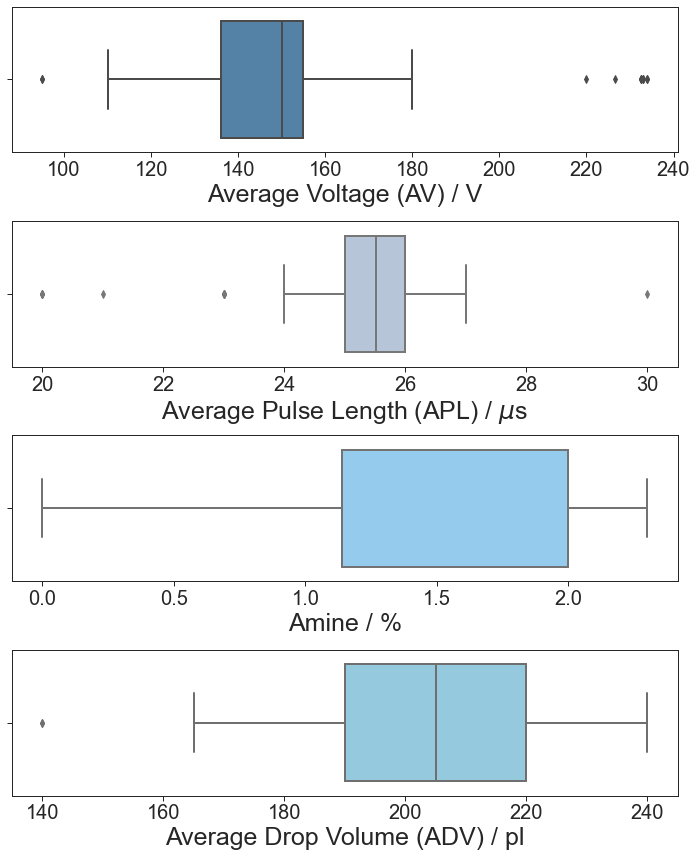

In [43]:
### Box plots

# Define drop formation variables
drop_formation = ['Average Voltage (V)', 'Average Pulse Length (us)', 'Amine (%)', 'Average Drop Volume (pl)']
drop_formation_colors = ['steelblue', 'lightsteelblue', 'lightskyblue', 'skyblue']

# Figure subplots and grid
fig, axs = plt.subplots(nrows = len(drop_formation), figsize=(8,10))

# Loop to generate the figure
for index, column in enumerate(drop_formation):
    
    # Plot the box plots
    sns.boxplot(x = column, data = data_final, color = drop_formation_colors[index], linewidth = 2.0, 
                ax=axs[index])
    
    # Customize ticks
    axs[index].tick_params(labelsize = 20)
    
# Customize label names
axs[0].set_xlabel('Average Voltage (AV) / V', fontsize = 25)
axs[1].set_xlabel(r'Average Pulse Length (APL) / $\mu$s', fontsize = 25)
axs[2].set_xlabel('Amine / %', fontsize = 25)
axs[3].set_xlabel('Average Drop Volume (ADV) / pl', fontsize = 25)

# Show the plot
plt.tight_layout(rect=(0, 0, 1.2, 1.2));
plt.show()

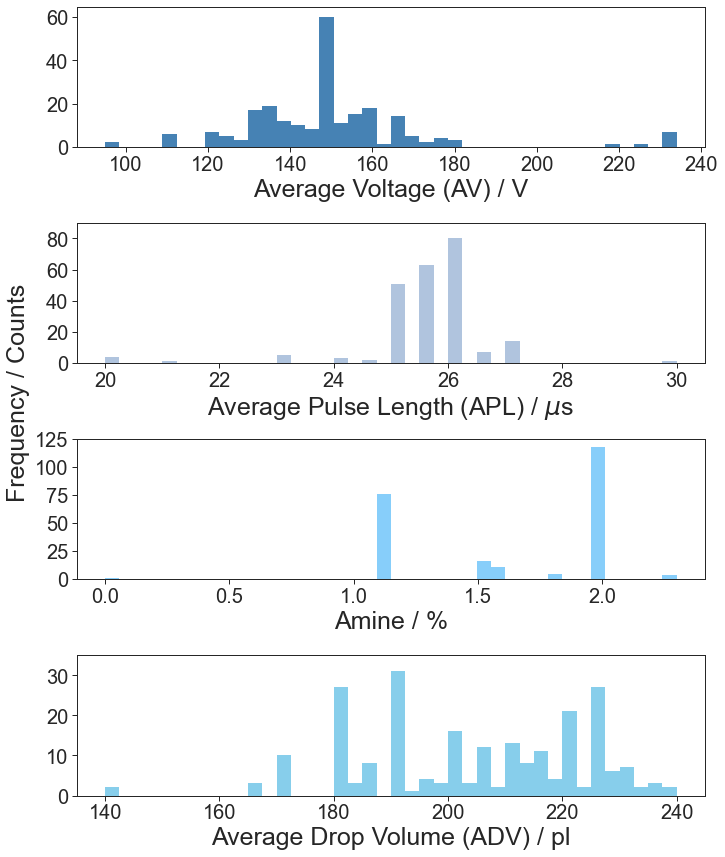

In [44]:
### Histograms

# Define the grid
fig, axes = plt.subplots(nrows = 4, figsize=(8,10))

# Loop to generate the figure
for index, column in enumerate(drop_formation):

    # Plot the histograms

    data_final[column].hist(bins = 40, edgecolor = drop_formation_colors[index], linewidth = 0.0,
                          xlabelsize = 26, ylabelsize = 26, grid = False, 
                            color = drop_formation_colors[index], ax = axes[index])

# Customize the ticks, labels and ranges
axes[0].set_xlabel('Average Voltage (AV) / V', fontsize = 25)
axes[0].tick_params(labelsize = 20)
axes[0].set_ylim([0, 65])
axes[0].set_yticks(np.arange(0, 65, 20))

axes[1].set_xlabel(r'Average Pulse Length (APL) / $\mu$s', fontsize = 25)
axes[1].tick_params(labelsize = 20)
axes[1].set_ylim([0, 90])
axes[1].set_yticks([0, 20, 40, 60, 80])

axes[2].set_xlabel('Amine / %', fontsize = 25)
axes[2].tick_params(labelsize = 20)
axes[2].set_ylim([0, 125])
axes[2].set_yticks([0, 25, 50, 75, 100, 125])

axes[3].set_xlabel('Average Drop Volume (ADV) / pl', fontsize = 25)
axes[3].tick_params(labelsize = 20)
axes[3].set_ylim([0, 35])
axes[3].set_yticks([0, 10, 20, 30])

fig.text(-0.03, 0.65, 'Frequency / Counts', va='center', rotation='vertical', fontsize = 25)

# Show the plot
plt.tight_layout(rect=(0, 0, 1.2, 1.2));
plt.show()

## Deposition and film variables

We will plot the variables that are related to the deposition by inkjet printing, i.e., the **Drop Pitch ($\mu$m)**, **Line Pitch ($\mu$m)**, **nº of drops** and **Total Volume Deposited ($\mu$l)**.

### Figure S3 from the Supporting Information

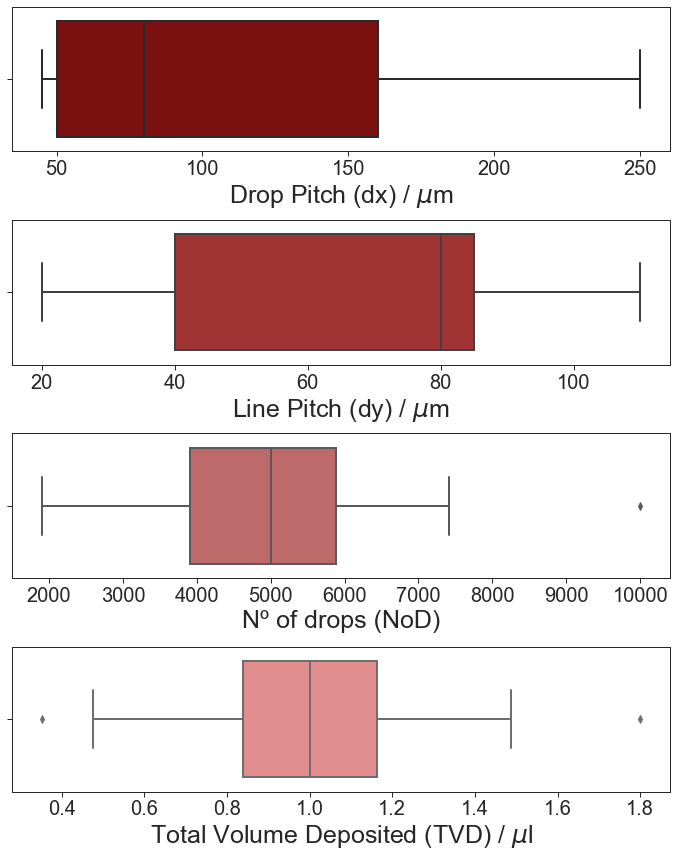

In [45]:
### Box plots

# Define deposition variables
deposition = ['Drop Pitch (um)', 'Line Pitch (um)', 'nº of drops', 'Total Volume Deposited (ul)']
deposition_colors = ['darkred', 'firebrick', 'indianred', 'lightcoral']

# Figure subplots and grid
fig, axs = plt.subplots(nrows = len(deposition), figsize=(8,10))

# Loop to generate the figure
for index, column in enumerate(deposition):
    
    # Plot the box plots
    sns.boxplot(x = column, data = data_final, color = deposition_colors[index], 
                linewidth = 2.0, ax=axs[index])
    
    # Customize ticks
    axs[index].tick_params(labelsize = 20)

# Customize the plot
axs[0].set_xlabel(r'Drop Pitch (dx) / $\mu$m', fontsize = 25)
axs[1].set_xlabel(r'Line Pitch (dy) / $\mu$m', fontsize = 25)
axs[2].set_xlabel('Nº of drops (NoD)', fontsize = 25)
axs[3].set_xlabel(r'Total Volume Deposited (TVD) / $\mu$l', fontsize = 25)

# Show the plot
plt.tight_layout(rect=(0, 0, 1.2, 1.2));
plt.show()

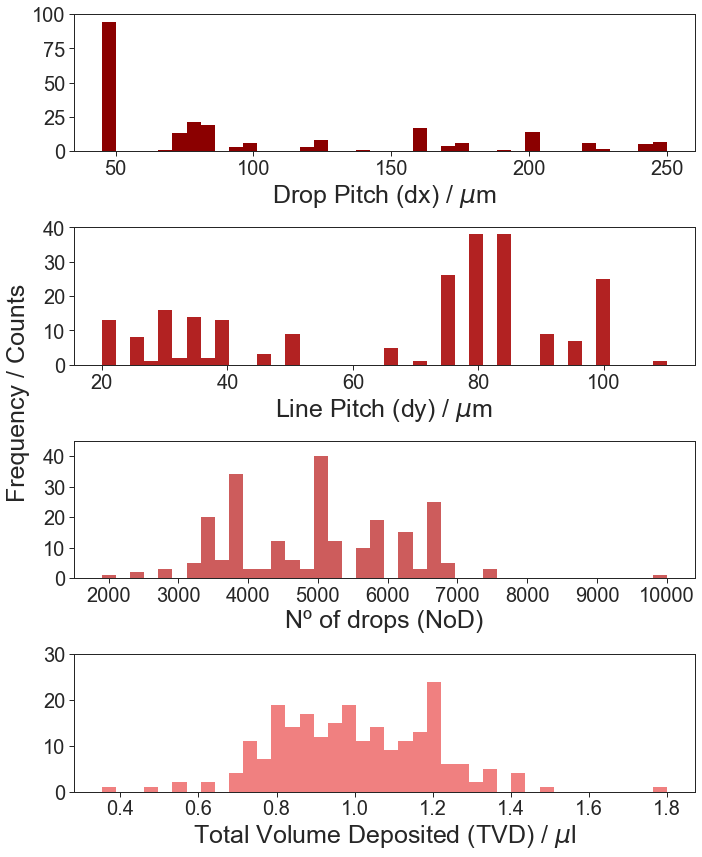

In [46]:
### Histograms

# Define the grid
fig, axes = plt.subplots(nrows = 4, figsize=(8,10))

# Loop to generate the figure
for index, column in enumerate(deposition):
    
    # Plot the box plots
    sns.boxplot(x = column, data = data_final, color = deposition_colors[index], 
                linewidth = 2.0, ax=axs[index])

    data_final[column].hist(bins = 40, edgecolor = deposition_colors[index], linewidth = 0.0,
                          xlabelsize = 26, ylabelsize = 26, grid = False, 
                            color = deposition_colors[index], ax = axes[index])

# Customize the plot
axes[0].set_xlabel(r'Drop Pitch (dx) / $\mu$m', fontsize = 25)
axes[0].tick_params(labelsize = 20)
axes[0].set_ylim([0, 100])
axes[0].set_yticks([0, 25, 50, 75, 100])

axes[1].set_xlabel(r'Line Pitch (dy) / $\mu$m', fontsize = 25)
axes[1].tick_params(labelsize = 20)
axes[1].set_ylim([0, 40])
axes[1].set_yticks([0, 10, 20, 30, 40])

axes[2].set_xlabel('Nº of drops (NoD)', fontsize = 25)
axes[2].tick_params(labelsize = 20)
axes[2].set_ylim([0, 45])
axes[2].set_yticks([0, 10, 20, 30, 40])

axes[3].set_xlabel(r'Total Volume Deposited (TVD) / $\mu$l', fontsize = 25)
axes[3].tick_params(labelsize = 20)
axes[3].set_ylim([0, 30])
axes[3].set_yticks([0, 10, 20, 30])

fig.text(-0.025, 0.65, 'Frequency / Counts', va='center', rotation='vertical', fontsize = 25)

# Show the plot
plt.tight_layout(rect=(0, 0, 1.2, 1.2));
plt.show()

## Correlation matrix of the dataset

We will represent the correlation matrix of the dataset with the average variables.

### Figure 1

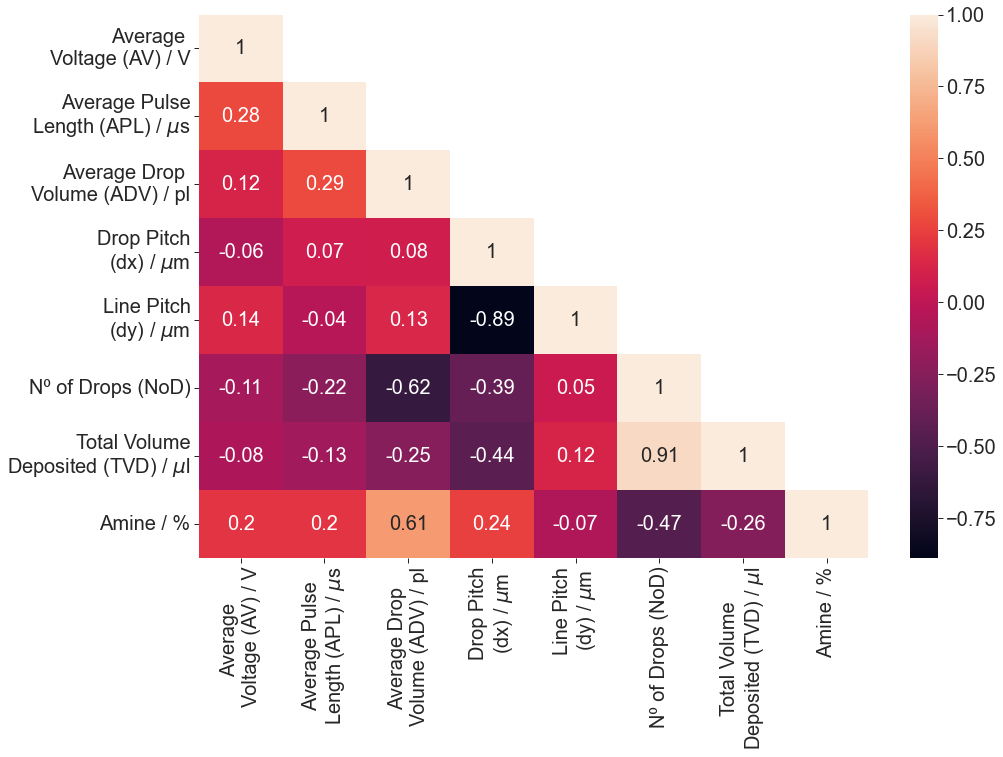

In [57]:
# Correlation matrix of the final dataset after filling NA values and using the average variables
corr = round(data_final.corr(), 2)

# Generate a mask for the correlation matrix to show the lower part
corr = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(labelsize=20)
g = sns.heatmap(corr, annot=True, annot_kws={"size": 20})

# Use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar

# Set the labelsize for the color bar
cbar.ax.tick_params(labelsize=20)

var_names = ['Average \nVoltage (AV) / V', r'Average Pulse' '\n' 'Length (APL) / $\mu$s', 
             'Average Drop \nVolume (ADV) / pl', r'Drop Pitch' '\n' '(dx) / $\mu$m', 
             r'Line Pitch' '\n' '(dy) / $\mu$m', 'Nº of Drops (NoD)', 
             r'Total Volume' '\n' 'Deposited (TVD) / $\mu$l', 'Amine / %']

ax.set_xticklabels(var_names)
ax.set_yticklabels(var_names)

# Show the plot
plt.show()

## Scatter plots and linear regressions
We will represent the scatter plots and the linear regressions between variables.

### Figure S4: Plots for the drop formation variables

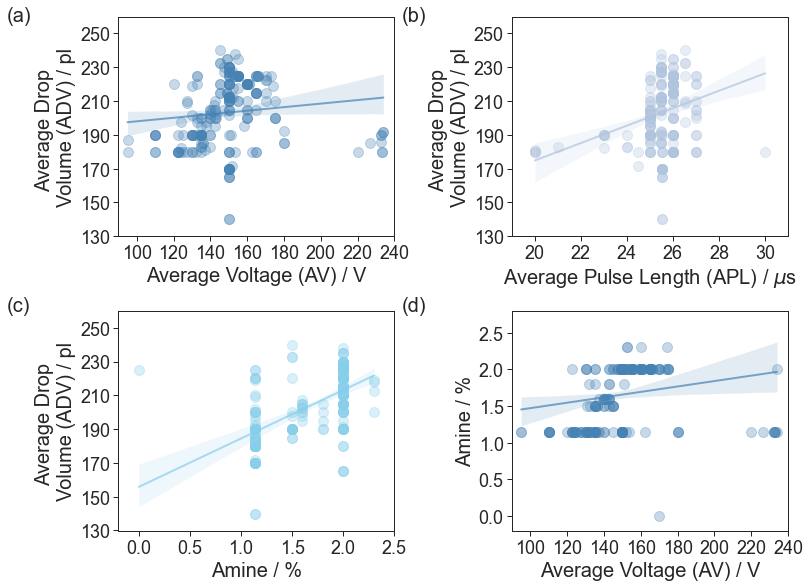

In [48]:
### Linear relations of the drop formation variables

# Define the grid
fig, axs_lr_adv = plt.subplots(nrows = 2, ncols = 2, figsize=(8,6))

sns.regplot(x = "Average Voltage (V)", y = "Average Drop Volume (pl)", 
            data = data_final, scatter_kws={"color":"steelblue","alpha":0.3,"s":100}, 
            line_kws={"color":"steelblue","alpha":0.7,"lw":2}, ax = axs_lr_adv[0][0]);

sns.regplot(x = "Average Pulse Length (us)", y = "Average Drop Volume (pl)", 
            data = data_final, scatter_kws={"color":"lightsteelblue","alpha":0.3,"s":100}, 
            line_kws={"color":"lightsteelblue","alpha":0.7,"lw":2}, ax = axs_lr_adv[0][1]);

sns.regplot(x = "Amine (%)", y = "Average Drop Volume (pl)", 
            data = data_final, scatter_kws={"color":"skyblue","alpha":0.3,"s":100}, 
            line_kws={"color":"skyblue","alpha":0.7,"lw":2}, ax = axs_lr_adv[1][0]);

sns.regplot(x = "Average Voltage (V)", y = "Amine (%)", 
            data = data_final, scatter_kws={"color":"steelblue","alpha":0.3,"s":100}, 
            line_kws={"color":"steelblue","alpha":0.7,"lw":2}, ax = axs_lr_adv[1][1]);

## Customize the plot
# ADV vs V
axs_lr_adv[0][0].set_xlabel('Average Voltage (AV) / V', fontsize = 20)
axs_lr_adv[0][0].set_ylabel('Average Drop \nVolume (ADV) / pl', fontsize = 20)
axs_lr_adv[0][0].tick_params(labelsize = 18)
axs_lr_adv[0][0].set_xlim([90,240])
axs_lr_adv[0][0].set_ylim([130,260])
axs_lr_adv[0][0].set_xticks(np.arange(100, 250, 20))
axs_lr_adv[0][0].set_yticks(np.arange(130, 260, 20))

# ADV vs PL
axs_lr_adv[0][1].set_xlabel(r'Average Pulse Length (APL) / $\mu$s', fontsize = 20)
axs_lr_adv[0][1].set_ylabel('Average Drop \nVolume (ADV) / pl', fontsize = 20)
axs_lr_adv[0][1].tick_params(labelsize = 18)
axs_lr_adv[0][1].set_xlim([19,31])
axs_lr_adv[0][1].set_ylim([130,260])
axs_lr_adv[0][1].set_xticks(np.arange(20, 31, 2))
axs_lr_adv[0][1].set_yticks(np.arange(130, 260, 20))

# ADV vs EA
axs_lr_adv[1][0].set_xlabel('Amine / %', fontsize = 20)
axs_lr_adv[1][0].set_ylabel('Average Drop \nVolume (ADV) / pl', fontsize = 20)
axs_lr_adv[1][0].tick_params(labelsize = 18)
axs_lr_adv[1][0].set_xlim([-0.2,2.5])
axs_lr_adv[1][0].set_ylim([130,260])
axs_lr_adv[1][0].set_xticks(np.arange(0, 2.6, 0.5))
axs_lr_adv[1][0].set_yticks(np.arange(130, 260, 20))

# EA vs V
axs_lr_adv[1][1].set_xlabel('Average Voltage (AV) / V', fontsize = 20)
axs_lr_adv[1][1].set_ylabel('Amine / %', fontsize = 20)
axs_lr_adv[1][1].tick_params(labelsize = 18)
axs_lr_adv[1][1].set_xlim([90,240])
axs_lr_adv[1][1].set_ylim([-0.2,2.8])
axs_lr_adv[1][1].set_xticks(np.arange(100, 250, 20))
axs_lr_adv[1][1].set_yticks(np.arange(0, 3, 0.5))

# Figure labels
fig.text(-0.015, 1.35, '(a)', va='center', rotation='horizontal', fontsize = 20)
fig.text(0.67, 1.35, '(b)', va='center', rotation='horizontal', fontsize = 20)
fig.text(-0.015, 0.68, '(c)', va='center', rotation='horizontal', fontsize = 20)
fig.text(0.67, 0.68, '(d)', va='center', rotation='horizontal', fontsize = 20)

# Set the spacing between subplots 
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=5,  
                    hspace=5)

# Show the plot
plt.tight_layout(rect=(0, 0, 1.4, 1.4), pad = 2.0);
plt.show()

### Figure S5: Plot for the Drop and Line Pitch

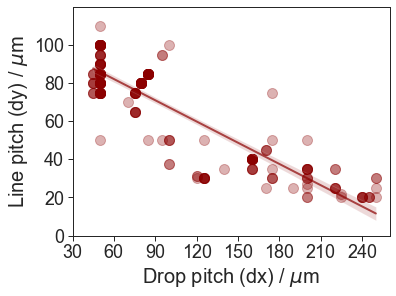

In [49]:
# Plot Drop pitch vs Line pitch
fig, axs_dp_lp = plt.subplots(nrows = 1, ncols = 1, figsize=(4,3))

sns.regplot(x = "Drop Pitch (um)", y = "Line Pitch (um)", 
            data = data_final, scatter_kws={"color":"darkred","alpha":0.3,"s":100}, 
            line_kws={"color":"darkred","alpha":0.7,"lw":2}, ax = axs_dp_lp);


axs_dp_lp.set_xlabel('Drop pitch (dx) / $\mu$m', fontsize = 20)
axs_dp_lp.set_ylabel('Line pitch (dy) / $\mu$m', fontsize = 20)
axs_dp_lp.tick_params(labelsize = 18)
axs_dp_lp.set_xlim([30,260])
axs_dp_lp.set_ylim([0,120])
axs_dp_lp.set_xticks(np.arange(30, 260, 30))
axs_dp_lp.set_yticks(np.arange(0, 120, 20))

# set the spacing between subplots 
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=5,  
                    hspace=0.5)

plt.tight_layout(rect=(0, 0, 1.4, 1.4));

### Figure S6: Plot for the deposition variables with the Nº of drops

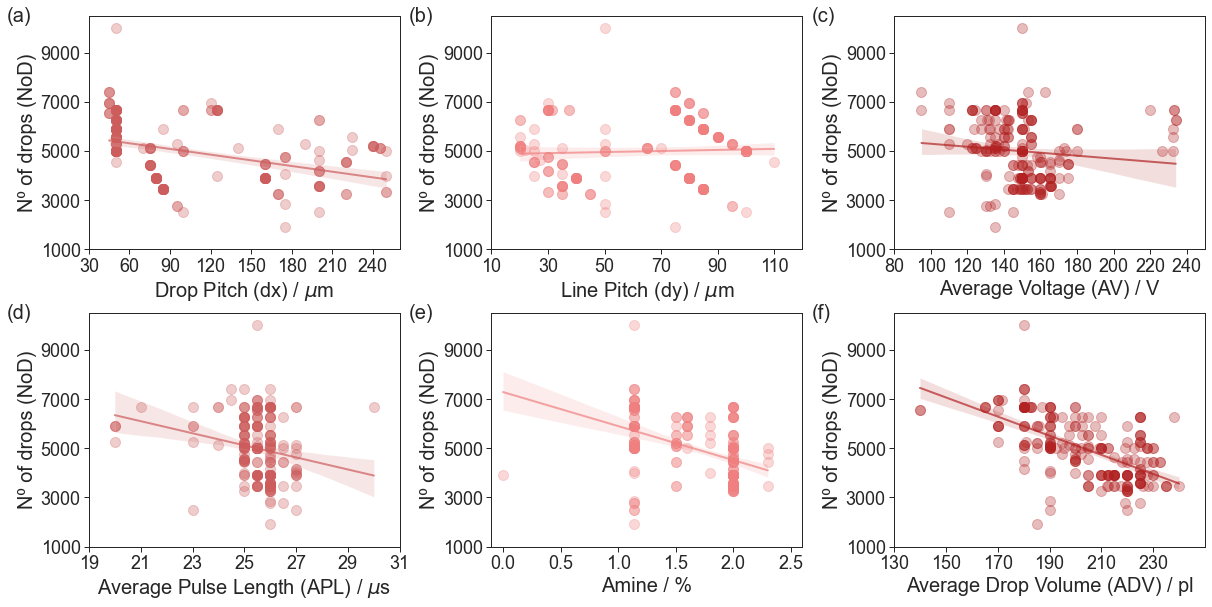

In [50]:
### Linear relations with the Nº of drops

# Define the grid
fig, axs_lr_drops = plt.subplots(nrows = 2, ncols = 3, figsize=(12,6))

sns.regplot(x = "Drop Pitch (um)", y = "nº of drops", 
            data = data_final, scatter_kws={"color":"indianred","alpha":0.3,"s":100}, 
            line_kws={"color":"indianred","alpha":0.7,"lw":2}, ax = axs_lr_drops[0][0]);

sns.regplot(x = "Line Pitch (um)", y = "nº of drops", 
            data = data_final, scatter_kws={"color":"lightcoral","alpha":0.3,"s":100}, 
            line_kws={"color":"lightcoral","alpha":0.7,"lw":2}, ax = axs_lr_drops[0][1]);

sns.regplot(x = "Average Voltage (V)", y = "nº of drops", 
            data = data_final, scatter_kws={"color":"firebrick","alpha":0.3,"s":100}, 
            line_kws={"color":"firebrick","alpha":0.7,"lw":2}, ax = axs_lr_drops[0][2]);

sns.regplot(x = "Average Pulse Length (us)", y = "nº of drops", 
            data = data_final, scatter_kws={"color":"indianred","alpha":0.3,"s":100}, 
            line_kws={"color":"indianred","alpha":0.7,"lw":2}, ax = axs_lr_drops[1][0]);

sns.regplot(x = "Amine (%)", y = "nº of drops", 
            data = data_final, scatter_kws={"color":"lightcoral","alpha":0.3,"s":100}, 
            line_kws={"color":"lightcoral","alpha":0.7,"lw":2}, ax = axs_lr_drops[1][1]);

sns.regplot(x = "Average Drop Volume (pl)", y = "nº of drops", 
            data = data_final, scatter_kws={"color":"firebrick","alpha":0.3,"s":100}, 
            line_kws={"color":"firebrick","alpha":0.7,"lw":2}, ax = axs_lr_drops[1][2]);

## Customize the plot
# Drops vs DP
axs_lr_drops[0][0].set_xlabel(r'Drop Pitch (dx) / $\mu$m', fontsize = 20)
axs_lr_drops[0][0].set_ylabel('Nº of drops (NoD)', fontsize = 20)
axs_lr_drops[0][0].tick_params(labelsize = 18)
axs_lr_drops[0][0].set_xlim([30,260])
axs_lr_drops[0][0].set_ylim([1000,10500])
axs_lr_drops[0][0].set_xticks(np.arange(30,260, 30))
axs_lr_drops[0][0].set_yticks(np.arange(1000,10500, 2000))

# Drops vs LP
axs_lr_drops[0][1].set_xlabel(r'Line Pitch (dy) / $\mu$m', fontsize = 20)
axs_lr_drops[0][1].set_ylabel('Nº of drops (NoD)', fontsize = 20)
axs_lr_drops[0][1].tick_params(labelsize = 18)
axs_lr_drops[0][1].set_xlim([10,120])
axs_lr_drops[0][1].set_ylim([1000,10500])
axs_lr_drops[0][1].set_xticks(np.arange(10, 120, 20))
axs_lr_drops[0][1].set_yticks(np.arange(1000,10500, 2000))

# Drops vs AV
axs_lr_drops[0][2].set_xlabel('Average Voltage (AV) / V', fontsize = 20)
axs_lr_drops[0][2].set_ylabel('Nº of drops (NoD)', fontsize = 20)
axs_lr_drops[0][2].tick_params(labelsize = 18)
axs_lr_drops[0][2].set_xlim([80, 250])
axs_lr_drops[0][2].set_ylim([1000,10500])
axs_lr_drops[0][2].set_xticks(np.arange(80, 250, 20))
axs_lr_drops[0][2].set_yticks(np.arange(1000,10500, 2000))

# Drops vs PL
axs_lr_drops[1][0].set_xlabel(r'Average Pulse Length (APL) / $\mu$s', fontsize = 20)
axs_lr_drops[1][0].set_ylabel('Nº of drops (NoD)', fontsize = 20)
axs_lr_drops[1][0].tick_params(labelsize = 18)
axs_lr_drops[1][0].set_xlim([19,31])
axs_lr_drops[1][0].set_ylim([1000,10500])
axs_lr_drops[1][0].set_xticks(np.arange(19,32,2))
axs_lr_drops[1][0].set_yticks(np.arange(1000,10500, 2000))

# Drops vs EA
axs_lr_drops[1][1].set_xlabel('Amine / %', fontsize = 20)
axs_lr_drops[1][1].set_ylabel('Nº of drops (NoD)', fontsize = 20)
axs_lr_drops[1][1].tick_params(labelsize = 18)
axs_lr_drops[1][1].set_xlim([-0.1, 2.6])
axs_lr_drops[1][1].set_ylim([1000,10500])
axs_lr_drops[1][1].set_xticks(np.arange(0, 2.6, 0.5))
axs_lr_drops[1][1].set_yticks(np.arange(1000,10500, 2000))

# Drops vs ADV
axs_lr_drops[1][2].set_xlabel('Average Drop Volume (ADV) / pl', fontsize = 20)
axs_lr_drops[1][2].set_ylabel('Nº of drops (NoD)', fontsize = 20)
axs_lr_drops[1][2].tick_params(labelsize = 18)
axs_lr_drops[1][2].set_xlim([130, 250])
axs_lr_drops[1][2].set_ylim([1000,10500])
axs_lr_drops[1][2].set_xticks(np.arange(130, 250, 20))
axs_lr_drops[1][2].set_yticks(np.arange(1000,10500, 2000))

# Figure labels
fig.text(0.00, 1.375, '(a)', va='center', rotation='horizontal', fontsize = 20)
fig.text(0.465, 1.375, '(b)', va='center', rotation='horizontal', fontsize = 20)
fig.text(0.931, 1.375, '(c)', va='center', rotation='horizontal', fontsize = 20)
fig.text(0.00, 0.6875, '(d)', va='center', rotation='horizontal', fontsize = 20)
fig.text(0.465, 0.6875, '(e)', va='center', rotation='horizontal', fontsize = 20)
fig.text(0.931, 0.6875, '(f)', va='center', rotation='horizontal', fontsize = 20)

# set the spacing between subplots 
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0,  
                    hspace=0.5)

plt.tight_layout(rect=(0, 0, 1.4, 1.4));

### Figure S7: Plot for the deposition variables with the Total Volume Deposited

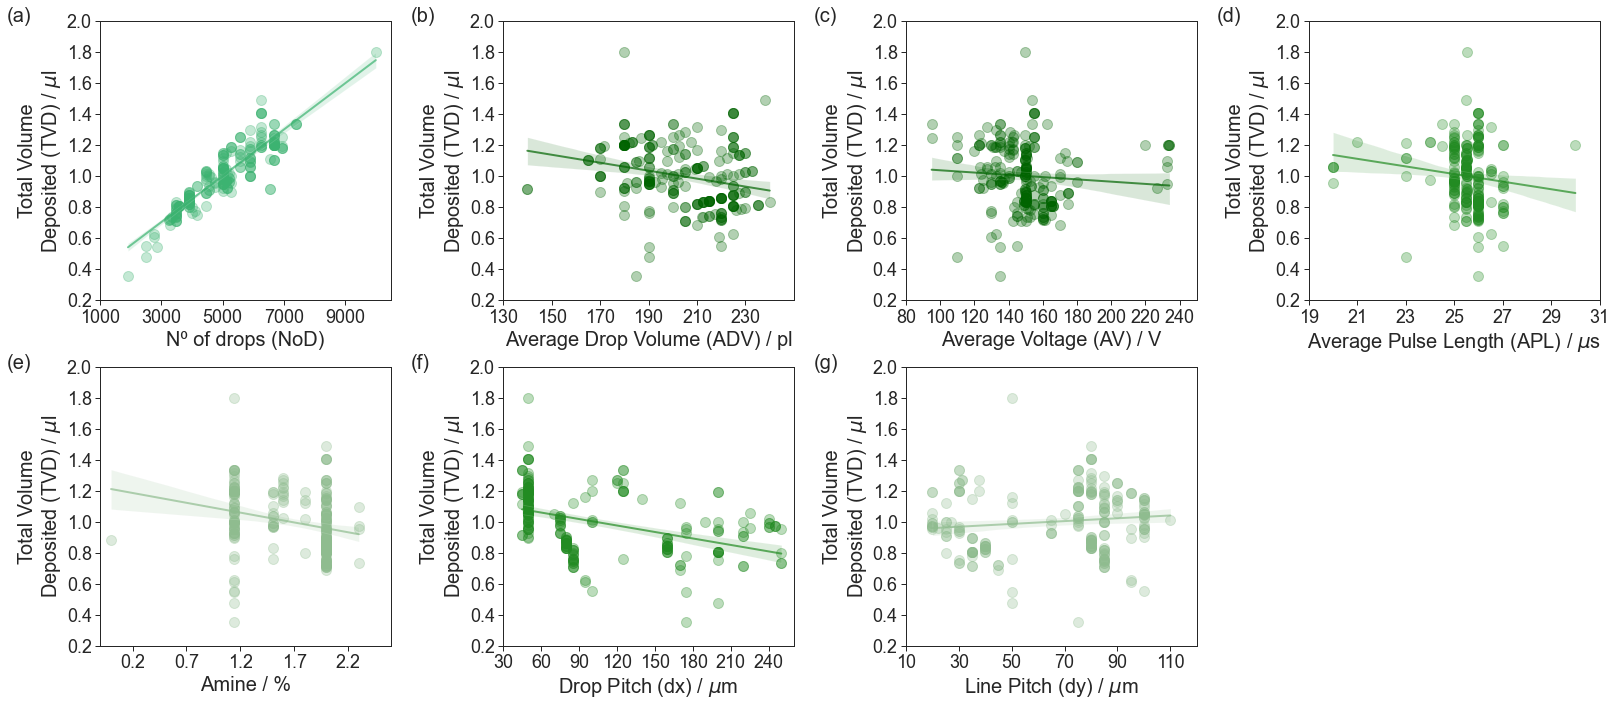

In [56]:
### Linear relations with the Total Deposited Volume

# Define the grid
fig, axs_lr_tdv = plt.subplots(nrows = 2, ncols = 4, figsize=(16,7))

sns.regplot(x = "nº of drops", y = "Total Volume Deposited (ul)", 
            data = data_final, scatter_kws={"color":"mediumseagreen","alpha":0.3,"s":100}, 
            line_kws={"color":"mediumseagreen","alpha":0.7,"lw":2}, ax = axs_lr_tdv[0][0]);

sns.regplot(x = "Average Drop Volume (pl)", y = "Total Volume Deposited (ul)", 
            data = data_final, scatter_kws={"color":"darkgreen","alpha":0.3,"s":100}, 
            line_kws={"color":"darkgreen","alpha":0.7,"lw":2}, ax = axs_lr_tdv[0][1]);

sns.regplot(x = "Average Voltage (V)", y = "Total Volume Deposited (ul)", 
            data = data_final, scatter_kws={"color":"darkgreen","alpha":0.3,"s":100}, 
            line_kws={"color":"darkgreen","alpha":0.7,"lw":2}, ax = axs_lr_tdv[0][2]);

sns.regplot(x = "Average Pulse Length (us)", y = "Total Volume Deposited (ul)", 
            data = data_final, scatter_kws={"color":"forestgreen","alpha":0.3,"s":100}, 
            line_kws={"color":"forestgreen","alpha":0.7,"lw":2}, ax = axs_lr_tdv[0][3]);

sns.regplot(x = "Amine (%)", y = "Total Volume Deposited (ul)", 
            data = data_final, scatter_kws={"color":"darkseagreen","alpha":0.3,"s":100}, 
            line_kws={"color":"darkseagreen","alpha":0.7,"lw":2}, ax = axs_lr_tdv[1][0]);

sns.regplot(x = "Drop Pitch (um)", y = "Total Volume Deposited (ul)", 
            data = data_final, scatter_kws={"color":"forestgreen","alpha":0.3,"s":100}, 
            line_kws={"color":"forestgreen","alpha":0.7,"lw":2}, ax = axs_lr_tdv[1][1]);

sns.regplot(x = "Line Pitch (um)", y = "Total Volume Deposited (ul)", 
            data = data_final, scatter_kws={"color":"darkseagreen","alpha":0.3,"s":100}, 
            line_kws={"color":"darkseagreen","alpha":0.7,"lw":2}, ax = axs_lr_tdv[1][2]);

## Customize the plot
# TDV vs Drops
axs_lr_tdv[0][0].set_xlabel('Nº of drops (NoD)', fontsize = 20)
axs_lr_tdv[0][0].set_ylabel(r'Total Volume' '\n' 'Deposited (TVD) / $\mu$l', fontsize = 20)
axs_lr_tdv[0][0].tick_params(labelsize = 18)
axs_lr_tdv[0][0].set_xlim([1000,10500])
axs_lr_tdv[0][0].set_ylim([0.2,2])
axs_lr_tdv[0][0].set_xticks(np.arange(1000,10500, 2000))
axs_lr_tdv[0][0].set_yticks(np.arange(0.2,2.1, 0.2))

# TDV vs ADV
axs_lr_tdv[0][1].set_xlabel('Average Drop Volume (ADV) / pl', fontsize = 20)
axs_lr_tdv[0][1].set_ylabel(r'Total Volume' '\n' 'Deposited (TVD) / $\mu$l', fontsize = 20)
axs_lr_tdv[0][1].tick_params(labelsize = 18)
axs_lr_tdv[0][1].set_xlim([130, 250])
axs_lr_tdv[0][1].set_ylim([0.2,2])
axs_lr_tdv[0][1].set_xticks(np.arange(130, 250, 20))
axs_lr_tdv[0][1].set_yticks(np.arange(0.2,2.1, 0.2))

# TDV vs AV
axs_lr_tdv[0][2].set_xlabel('Average Voltage (AV) / V', fontsize = 20)
axs_lr_tdv[0][2].set_ylabel(r'Total Volume' '\n' 'Deposited (TVD) / $\mu$l', fontsize = 20)
axs_lr_tdv[0][2].tick_params(labelsize = 18)
axs_lr_tdv[0][2].set_xlim([80, 250])
axs_lr_tdv[0][2].set_ylim([0.2,2])
axs_lr_tdv[0][2].set_xticks(np.arange(80, 250, 20))
axs_lr_tdv[0][2].set_yticks(np.arange(0.2,2.1, 0.2))

# TDV vs PL
axs_lr_tdv[0][3].set_xlabel(r'Average Pulse Length (APL) / $\mu$s', fontsize = 20)
axs_lr_tdv[0][3].set_ylabel(r'Total Volume' '\n' 'Deposited (TVD) / $\mu$l', fontsize = 20)
axs_lr_tdv[0][3].tick_params(labelsize = 18)
axs_lr_tdv[0][3].set_xlim([19,31])
axs_lr_tdv[0][3].set_ylim([0.2,2])
axs_lr_tdv[0][3].set_xticks(np.arange(19,32,2))
axs_lr_tdv[0][3].set_yticks(np.arange(0.2,2.1, 0.2))

# TDV vs EA
axs_lr_tdv[1][0].set_xlabel('Amine / %', fontsize = 20)
axs_lr_tdv[1][0].set_ylabel(r'Total Volume' '\n' 'Deposited (TVD) / $\mu$l', fontsize = 20)
axs_lr_tdv[1][0].tick_params(labelsize = 18)
axs_lr_tdv[1][0].set_xlim([-0.1, 2.6])
axs_lr_tdv[1][0].set_ylim([0.2,2])
axs_lr_tdv[1][0].set_xticks(np.arange(0.2, 2.6, 0.5))
axs_lr_tdv[1][0].set_yticks(np.arange(0.2,2.1, 0.2))

# TDV vs DP
axs_lr_tdv[1][1].set_xlabel(r'Drop Pitch (dx) / $\mu$m', fontsize = 20)
axs_lr_tdv[1][1].set_ylabel(r'Total Volume' '\n' 'Deposited (TVD) / $\mu$l', fontsize = 20)
axs_lr_tdv[1][1].tick_params(labelsize = 18)
axs_lr_tdv[1][1].set_xlim([30,260])
axs_lr_tdv[1][1].set_ylim([0.2,2])
axs_lr_tdv[1][1].set_xticks(np.arange(30,260, 30))
axs_lr_tdv[1][1].set_yticks(np.arange(0.2,2.1, 0.2))

# TDV vs LP
axs_lr_tdv[1][2].set_xlabel(r'Line Pitch (dy) / $\mu$m', fontsize = 20)
axs_lr_tdv[1][2].set_ylabel(r'Total Volume' '\n' 'Deposited (TVD) / $\mu$l', fontsize = 20)
axs_lr_tdv[1][2].tick_params(labelsize = 18)
axs_lr_tdv[1][2].set_xlim([10,120])
axs_lr_tdv[1][2].set_ylim([0.2,2])
axs_lr_tdv[1][2].set_xticks(np.arange(10, 120, 20))
axs_lr_tdv[1][2].set_yticks(np.arange(0.2,2.1, 0.2))

# 8th axis off
axs_lr_tdv[-1, -1].axis('off')

# Figure labels
fig.text(0.0, 1.375, '(a)', va='center', rotation='horizontal', fontsize = 20)
fig.text(0.35, 1.375, '(b)', va='center', rotation='horizontal', fontsize = 20)
fig.text(0.70, 1.375, '(c)', va='center', rotation='horizontal', fontsize = 20)
fig.text(1.05, 1.375, '(d)', va='center', rotation='horizontal', fontsize = 20)

fig.text(0.0, 0.6875, '(e)', va='center', rotation='horizontal', fontsize = 20)
fig.text(0.35, 0.6875, '(f)', va='center', rotation='horizontal', fontsize = 20)
fig.text(0.70, 0.6875, '(g)', va='center', rotation='horizontal', fontsize = 20)

# set the spacing between subplots 
plt.subplots_adjust(left=0.0, 
                    bottom=0.0,  
                    right=0.9,  
                    top=0.9,  
                    wspace=50,  
                    hspace=1)

plt.tight_layout(rect=(0, 0, 1.4, 1.4));